In [75]:
import sys
sys.path.append('/home/paxml-user/')
from processingNetwork.ProcessingNetwork import ProcessingNetwork
from processingNetwork.ProcessingNode import ProcessingNode


# Data Processing Example
## 1 First we will generate some data we want to process

In [76]:
import numpy as np
data = np.random.rand(150,1)
data

array([[ 0.57846701],
       [ 0.66662909],
       [ 0.83961302],
       [ 0.65500849],
       [ 0.37495675],
       [ 0.94837147],
       [ 0.44634919],
       [ 0.82452823],
       [ 0.63333547],
       [ 0.5940187 ],
       [ 0.32792538],
       [ 0.8979111 ],
       [ 0.30224077],
       [ 0.58916671],
       [ 0.55383475],
       [ 0.78452166],
       [ 0.6475785 ],
       [ 0.20522476],
       [ 0.62276852],
       [ 0.61981605],
       [ 0.37387896],
       [ 0.91934057],
       [ 0.20555212],
       [ 0.09147138],
       [ 0.07768727],
       [ 0.71455803],
       [ 0.62927723],
       [ 0.02522231],
       [ 0.91272451],
       [ 0.98263859],
       [ 0.15070719],
       [ 0.89179884],
       [ 0.033008  ],
       [ 0.89895039],
       [ 0.99701604],
       [ 0.3809882 ],
       [ 0.14003412],
       [ 0.81995948],
       [ 0.46659849],
       [ 0.41190515],
       [ 0.17166819],
       [ 0.9683917 ],
       [ 0.49409161],
       [ 0.33232818],
       [ 0.53331678],
       [ 0

## 2. We create some processing steps for the 5 point moving average of the data points.

In [77]:
class MovingAverage(ProcessingNode):
    def do_init(self):
        pass
    
    def do_process(self,feature):
        feature[self.settings['name']] = None
        
        # Load List from first dependency
        if(len(self.dependencies) > 0 ):
            valueKey = next(iter(self.dependencies)) 
            numericalList = feature[valueKey]
            
            # Moving Average
            tSum = np.sum(numericalList)
            feature[self.settings['name']] = tSum/len(numericalList)
        return feature
    


In [78]:
class PointBuffer(ProcessingNode):
    def do_init(self):
        self.settings['points'] = 5
        self.buffer = []
        pass

    def do_process(self,feature):
        feature[self.settings['name']] = []
        self.buffer.append(feature[self.settings['input']])
        if len(self.buffer) > self.settings['points'] :
            self.buffer.pop(0)
        if len(self.buffer) == self.settings['points']:
            feature[self.settings['name']] = self.buffer.copy()  
        return feature
        


## 3. Create a two node network

In [79]:
p_def = {}

p_def['PointBuffer']= {'name':'PointBuffer', 
             'type': PointBuffer,
             'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
             'dependencies':[]}

p_def['MovingAverage']= {'name':'MovingAverage', 
             'type': MovingAverage,
             'settings':{},
             'dependencies':['PointBuffer']}

pn = ProcessingNetwork(p_def)


## 4. Process the points

In [80]:
features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)
print(len(features))

150


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [81]:
features

[{'MovingAverage': nan, 'PointBuffer': [], 'number': 0.57846701073279461},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.66662909051966646},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.83961301617428286},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.65500848864276495},
 {'MovingAverage': 0.62293487180945539,
  'PointBuffer': [0.57846701073279461,
   0.57846701073279461,
   0.66662909051966646,
   0.66662909051966646,
   0.83961301617428286,
   0.83961301617428286,
   0.65500848864276495,
   0.65500848864276495,
   0.37495675297776798,
   0.37495675297776798],
  'number': 0.37495675297776798},
 {'MovingAverage': 0.69691576328856386,
  'PointBuffer': [0.66662909051966646,
   0.66662909051966646,
   0.83961301617428286,
   0.83961301617428286,
   0.65500848864276495,
   0.65500848864276495,
   0.37495675297776798,
   0.37495675297776798,
   0.94837146812833673,
   0.94837146812833673],
  'number': 0.94837146812833673},
 {'MovingAverage': 0.65285978357063057,


## 5. Visualize

In [82]:
import pandas as pd
df = pd.DataFrame(features)

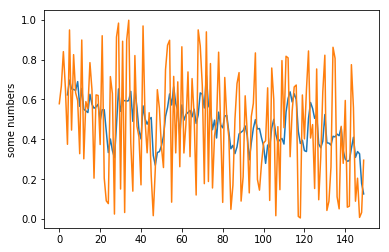

In [83]:
import matplotlib.pyplot as plt
plt.plot(df['MovingAverage'])
plt.plot(df['number'])

plt.ylabel('some numbers')
plt.show()

# 6. Reconfigure as needed:

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


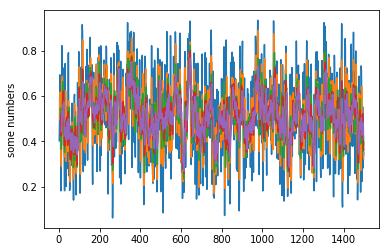

In [94]:
p_def = {}

for i in range(5,30,5):

    si = str(i)
    p_def['PointBuffer'+ str(i)]= {'name':'PointBuffer'+ str(i), 
                 'type': PointBuffer,
                 'settings':{'points':i, 'input':'number'}, ######## NOTE: Setting points to 10
                 'dependencies':[]}


    p_def['MovingAverage'+ str(i)]= {'name':'MovingAverage'+ str(i), 
                 'type': MovingAverage,
                 'settings':{},
                 'dependencies':['PointBuffer'+ str(i)]}


pn = ProcessingNetwork(p_def)

features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)

df = pd.DataFrame(features)

for i in  range(5,30,5):
    plt.plot(df['MovingAverage'+ str(i)])

plt.ylabel('some numbers')
plt.show()